In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from IPython.display import clear_output
import seaborn as sns

import cPickle as pk
import pandas as pd
import networkx as nx
import scipy.sparse as sp
import itertools as itls
from itertools import combinations
import numpy as np
from math import sqrt

import sys

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Importing
[to top](#Table-of-Contents) 

In [2]:
pwd

u'/Users/Cerigo/Dropbox/Research/Innovation/EPO/Data_processing/Python'

In [18]:
sims_intersect_2010 = pk.load(open('pickles_and_munged_csv/sim_dfs/all_grant_no_priors_pre1950_deltacon_intersec_sim_2010.pk',
                            'rb'))

In [4]:
sims_union_2010 = pk.load(open('pickles_and_munged_csv/sim_dfs/all_grant_no_priors_pre1950_deltacon_union_sim_2010.pk',
                            'rb'))

In [5]:
sims_union_US_1836_1900  = pk.load(open('pickles_and_munged_csv/sim_dfs/all_grant_no_priors_pre1950_deltacon_union_sim_US_1836_1900.pk',
                            'rb'))

In [6]:
s_ord_by_nodes = pk.load(open('pickles_and_munged_csv/pre1950_ord_by_nodes.pk', 'rb'))
s_ord_by_nodes.head()

appln_auth
US    7177
JP    7108
DE    7026
FR    7000
GB    6796
Name: 2010, dtype: int64

In [7]:
s_ord_by_links = pk.load(open('pickles_and_munged_csv/pre1950_ord_by_links.pk', 'rb'))
s_ord_by_links.head()

appln_auth
US    18018884
JP    17023346
FR     2942850
DE     2877838
GB     1057069
Name: 2010, dtype: int64

# Make size similarity heat maps

In [8]:
def lin_sim_of_sizes(s1, s2):
    diff =  abs(s1 - s2)
    norm = s1 + s2
    d = diff/float(norm)
    return 1 - d

In [9]:
def quad_sim_of_sizes(s1, s2):
    diff =  abs(s1 - s2)**2
    norm = (s1 + s2)**2
    d = diff/float(norm)
    return 1 - d

In [10]:
lin_sim_of_sizes(10000, 1000)

0.18181818181818177

In [11]:
quad_sim_of_sizes(100000, 10000)

0.3305785123966942

In [12]:
sims_lin_node_size = pd.DataFrame()
for i, ctry1 in enumerate(s_ord_by_nodes.index):
    for j, ctry2 in enumerate(s_ord_by_nodes.index[i:]):
        sims_lin_node_size.loc[ctry1,ctry2] = lin_sim_of_sizes(s_ord_by_nodes.loc[ctry1], s_ord_by_nodes.loc[ctry2])
        sims_lin_node_size.loc[ctry2,ctry1] = lin_sim_of_sizes(s_ord_by_nodes.loc[ctry2], s_ord_by_nodes.loc[ctry1])

sims_lin_node_size.head()

,US,JP,DE,FR,GB,CH,ES,IT,CA,AT,...,NL,SE,FI,BE,NO,DK,GR,LU,IE,IS
US,1.000000,0.995170,0.989368,0.987515,0.972733,0.922291,0.872959,0.868695,0.867088,0.853789,...,0.817335,0.767685,0.767368,0.688773,0.639173,0.603153,0.487779,0.474115,0.414623,0.039339
JP,0.995170,1.000000,0.994198,0.992345,0.977560,0.927094,0.877714,0.873445,0.871836,0.858519,...,0.822009,0.772260,0.771942,0.693142,0.643382,0.607230,0.491351,0.477618,0.417807,0.039713
DE,0.989368,0.994198,1.000000,0.998146,0.983360,0.932868,0.883433,0.879158,0.877546,0.864210,...,0.827632,0.777768,0.777449,0.698407,0.648456,0.612148,0.495664,0.481850,0.421656,0.040167
FR,0.987515,0.992345,0.998146,1.000000,0.985213,0.934713,0.885262,0.880985,0.879372,0.866029,...,0.829431,0.779531,0.779212,0.700093,0.650082,0.613724,0.497048,0.483207,0.422891,0.040314
GB,0.972733,0.977560,0.983360,0.985213,1.000000,0.949451,0.899879,0.895588,0.893970,0.880580,...,0.843824,0.793645,0.793324,0.713610,0.663126,0.626377,0.508177,0.494128,0.432838,0.041499


In [13]:
sims_lin_links_size = pd.DataFrame()
for i, ctry1 in enumerate(s_ord_by_links.index):
    for j, ctry2 in enumerate(s_ord_by_links.index[i:]):
        sims_lin_links_size.loc[ctry1,ctry2] = lin_sim_of_sizes(s_ord_by_links.loc[ctry1], s_ord_by_links.loc[ctry2])
        sims_lin_links_size.loc[ctry2,ctry1] = lin_sim_of_sizes(s_ord_by_links.loc[ctry2], s_ord_by_links.loc[ctry1])

sims_lin_links_size.head()

,US,JP,FR,DE,GB,CH,IT,CA,AU,AT,...,SE,NL,FI,LU,BE,NO,DK,GR,IE,IS
US,1.000000,0.971590,0.280783,0.275434,0.110827,0.049893,0.045072,0.028802,0.020754,0.019899,...,0.013822,0.012762,0.012000,0.008374,0.005939,0.004711,0.003038,0.001428,0.001230,0.000051
JP,0.971590,1.000000,0.294783,0.289213,0.116930,0.052734,0.047645,0.030461,0.021954,0.021050,...,0.014624,0.013503,0.012697,0.008862,0.006285,0.004986,0.003215,0.001511,0.001302,0.000054
FR,0.280783,0.294783,1.000000,0.988831,0.528545,0.270874,0.247408,0.164238,0.120661,0.115931,...,0.081737,0.075665,0.071284,0.050197,0.035818,0.028503,0.018458,0.008710,0.007507,0.000313
DE,0.275434,0.289213,0.988831,1.000000,0.537278,0.276148,0.252293,0.167637,0.123219,0.118395,...,0.083506,0.077308,0.072836,0.051302,0.036612,0.029137,0.018871,0.008906,0.007676,0.000320
GB,0.110827,0.116930,0.528545,0.537278,1.000000,0.607358,0.564256,0.398810,0.303276,0.292501,...,0.212090,0.197331,0.186589,0.133759,0.096628,0.077383,0.050553,0.024061,0.020759,0.000872


# Func for setting diag of df

In [26]:
def make_with_diag_to(df, val):
    df_temp = df.copy()
    for i in range(len(df_temp)):
        df_temp.iloc[i,i] = val
    return df_temp

In [15]:
make_with_diag_to(sims_lin_links_size, 0).head()

,US,JP,FR,DE,GB,CH,IT,CA,AU,AT,...,SE,NL,FI,LU,BE,NO,DK,GR,IE,IS
US,0.000000,0.971590,0.280783,0.275434,0.110827,0.049893,0.045072,0.028802,0.020754,0.019899,...,0.013822,0.012762,0.012000,0.008374,0.005939,0.004711,0.003038,0.001428,0.001230,0.000051
JP,0.971590,0.000000,0.294783,0.289213,0.116930,0.052734,0.047645,0.030461,0.021954,0.021050,...,0.014624,0.013503,0.012697,0.008862,0.006285,0.004986,0.003215,0.001511,0.001302,0.000054
FR,0.280783,0.294783,0.000000,0.988831,0.528545,0.270874,0.247408,0.164238,0.120661,0.115931,...,0.081737,0.075665,0.071284,0.050197,0.035818,0.028503,0.018458,0.008710,0.007507,0.000313
DE,0.275434,0.289213,0.988831,0.000000,0.537278,0.276148,0.252293,0.167637,0.123219,0.118395,...,0.083506,0.077308,0.072836,0.051302,0.036612,0.029137,0.018871,0.008906,0.007676,0.000320
GB,0.110827,0.116930,0.528545,0.537278,0.000000,0.607358,0.564256,0.398810,0.303276,0.292501,...,0.212090,0.197331,0.186589,0.133759,0.096628,0.077383,0.050553,0.024061,0.020759,0.000872


# Func for boosting sims by sqrt times

In [28]:
def boost_sqrt_times(df, n):
    df_temp = df.copy()
    for i in range(n):
        df_temp = df_temp.applymap(sqrt)
    return df_temp

In [17]:
def boost_log_times(df, n):
    df_temp = df.copy()
    for i in range(n):
        df_temp = df_temp.applymap(np.log)
    return df_temp

In [18]:
np.log(0.5)

-0.69314718055994529

# Plotting Comparisons

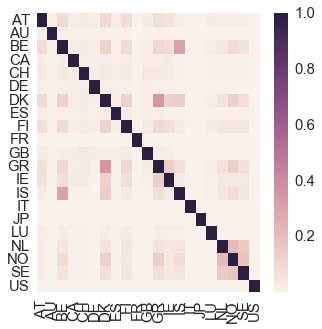

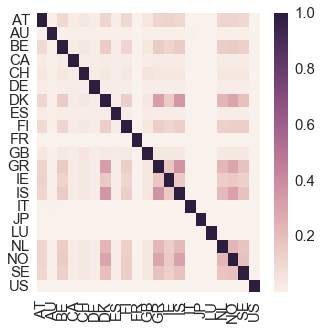

In [20]:
plt.figure(figsize=(5,5))
sns.heatmap(sims_intersect_2010)#, figsize=(5,5))
plt.figure(figsize=(5,5))
sns.heatmap(sims_union_2010)#, figsize=(5,5))

In [13]:
sns.set(font_scale=1.5)

TypeError: set() got an unexpected keyword argument 'yticks'

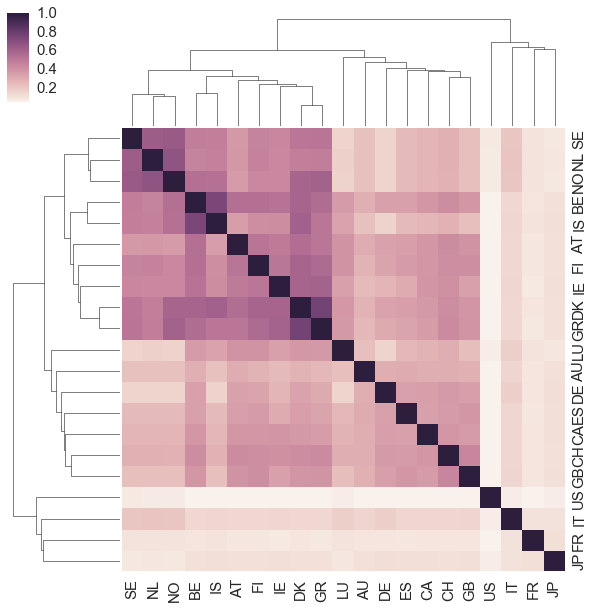

In [33]:
sns.clustermap(make_with_diag_to(boost_sqrt_times(sims_intersect_2010,2),1))
ax = plt.gca()
plt.sca(ax)
ax.set_yticks(rotation=90)
#plt.savefig('figures/pre1950_DeltaCons/inter_boosted_2_2010.pdf')

In [ ]:
sns.clustermap(make_with_diag_to(boost_sqrt_times(sims_intersect_2010,2),1), figsize=(5,5))

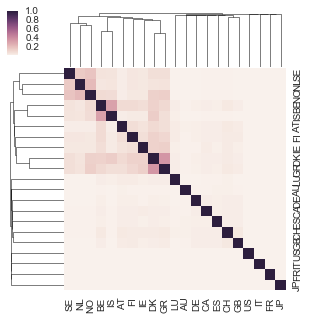

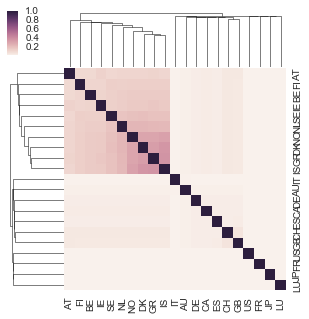

In [114]:
sns.clustermap(sims_intersect_2010, figsize=(5,5))
sns.clustermap(sims_union_2010, figsize=(5,5))

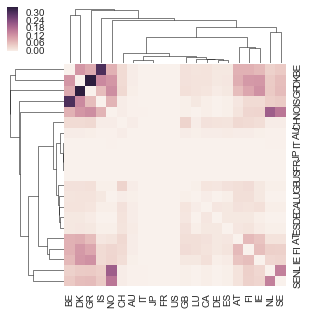

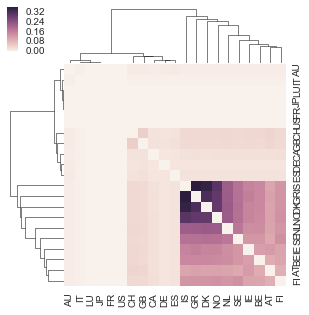

In [119]:
sns.clustermap(make_with_diag_to(boost_sqrt_times(sims_intersect_2010,0),0), figsize=(5,5))
sns.clustermap(make_with_diag_to(boost_sqrt_times(sims_union_2010,0),0), figsize=(5,5))

# Showing that the technolohy spaces of countries diverge as they grow

# And that the union is dominated by sizes, and interesct is (not?) less so

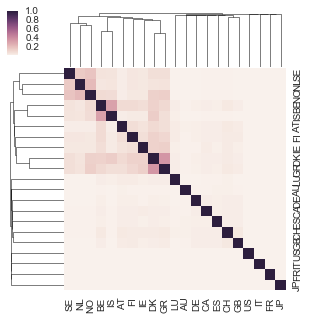

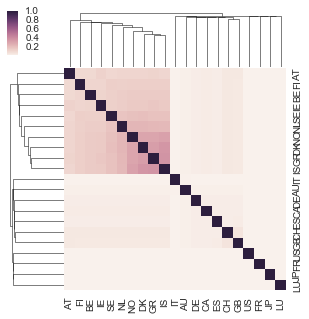

In [20]:
sns.clustermap(make_with_diag_to(boost_sqrt_times(sims_intersect_2010,0),1), figsize=(5,5))
sns.clustermap(make_with_diag_to(boost_sqrt_times(sims_union_2010,0),1), figsize=(5,5))

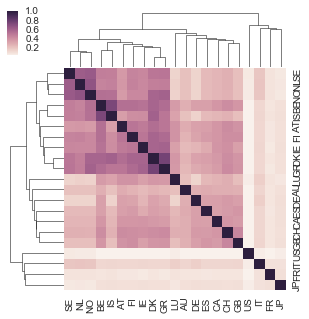

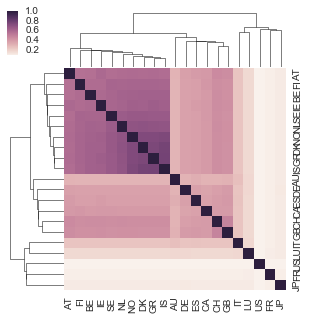

In [121]:
sns.clustermap(make_with_diag_to(boost_sqrt_times(sims_intersect_2010,2),1), figsize=(5,5))
sns.clustermap(make_with_diag_to(boost_sqrt_times(sims_union_2010,2),1), figsize=(5,5))

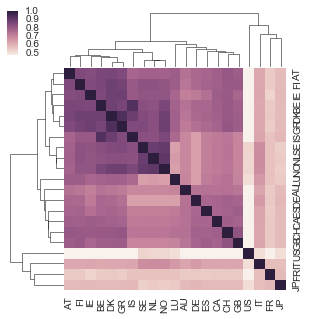

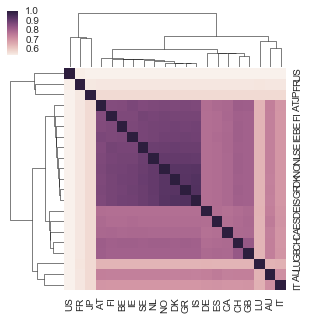

In [120]:
sns.clustermap(make_with_diag_to(boost_sqrt_times(sims_intersect_2010,4),1), figsize=(5,5))
sns.clustermap(make_with_diag_to(boost_sqrt_times(sims_union_2010,4),1), figsize=(5,5))

In [90]:
s_ord_by_links

appln_auth
US    18018884
JP    17023346
FR     2942850
DE     2877838
GB     1057069
CH      461008
IT      415434
CA      263285
AU      188943
AT      181080
ES      136316
SE      125394
NL      115713
FI      108766
LU       75763
BE       53664
NO       42546
DK       27412
GR       12872
IE       11087
IS         461
Name: 2010, dtype: int64

In [68]:
s_ord_by_nodes

appln_auth
US    7177
JP    7108
DE    7026
FR    7000
GB    6796
CH    6142
ES    5559
IT    5511
CA    5493
AT    5346
AU    5141
NL    4960
SE    4471
FI    4468
BE    3770
NO    3371
DK    3099
GR    2315
LU    2230
IE    1877
IS     144
Name: 2010, dtype: int64

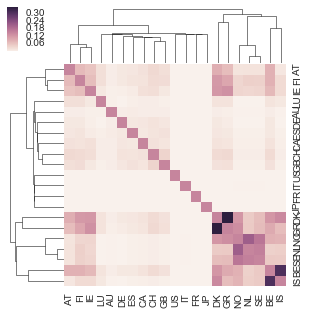

In [85]:
sns.clustermap(make_with_diag_to(sims_intersect_2010,0.15), figsize=(5,5))

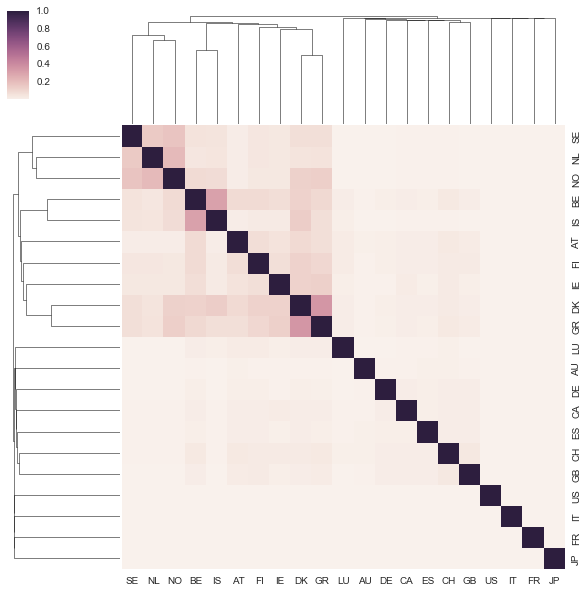

In [57]:
sns.clustermap(sims_intersect_2010)

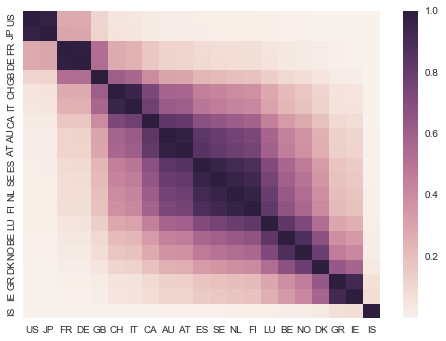

In [54]:
sns.heatmap(make_with_diag_to(sims_lin_links_size,1))

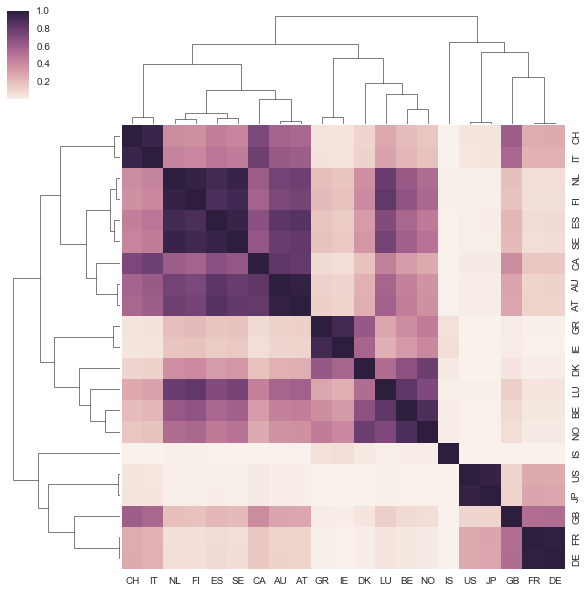

In [55]:
sns.clustermap(make_with_diag_to(sims_lin_links_size,1))

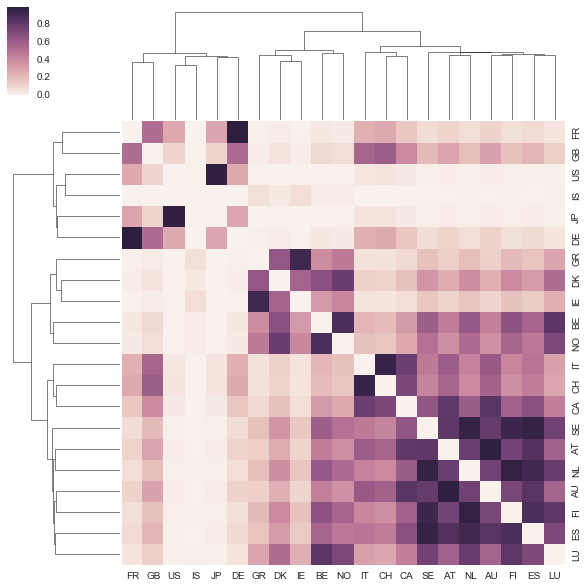

In [56]:
sns.clustermap(make_with_diag_to(sims_lin_links_size,0))

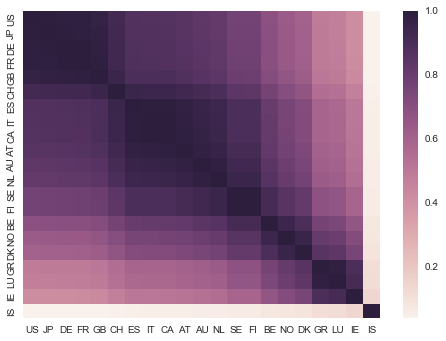

In [91]:
sns.heatmap(make_with_diag_to(sims_lin_node_size,1))

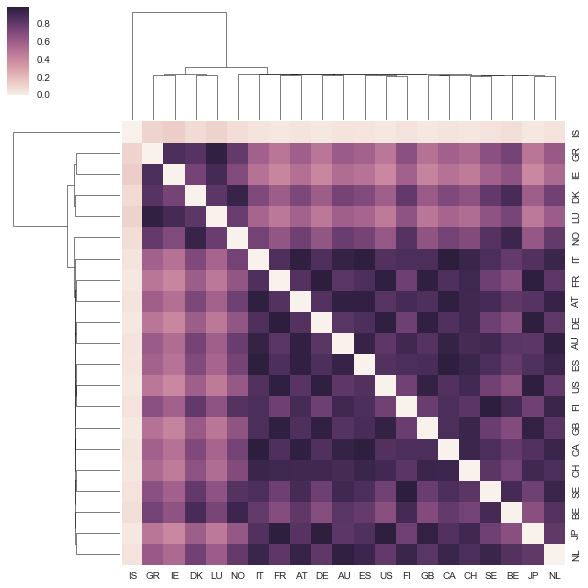

In [62]:
sns.clustermap(make_with_diag_to(sims_lin_node_size,0))

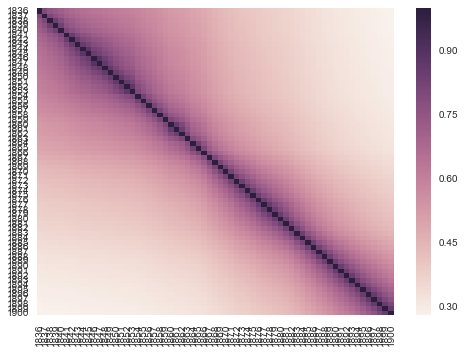

In [99]:
sns.heatmap(sims_union_US_1836_1900)